# 1. Load Data

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import graphviz

# Load Data
players = pd.read_csv('players.csv', index_col=[0])
x = players.drop(columns=['result'])
y = players['result']

# 2. Split Data and Initialize Classifier

In [3]:
# split train 70% and test 30%
X_train, X_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.3, random_state=0)

tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

score = tree.fit(X_train, y_train).score(X_test, y_test)
y_pred = tree.predict(X_test)
print("Score: {}".format(score))

Score: 0.9906666666666667


# 3. Generate Decision Tree Graph

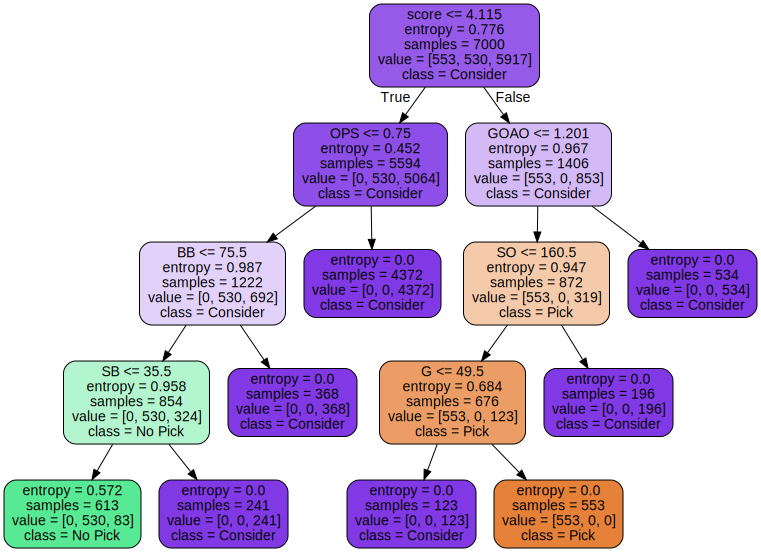

In [4]:
# Generate Graph
# if you want to output the dot file into png then 
# set the out_file="filename.dot" and use the command `dot -Tpng tree.dot -o tree.png`
dot = export_graphviz(tree, out_file=None,
                      feature_names=x.columns.values,
                      class_names=['Pick', 'No Pick', 'Consider'], filled=True, rounded=True)

graph = graphviz.Source(dot)
graph

# 4. Extract Important Features

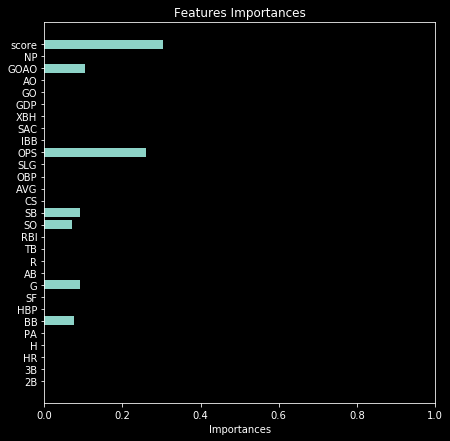

In [5]:
y_importances = tree.feature_importances_
x_importances = x.columns.values
y_pos = np.arange(len(x_importances))

plt.subplots(figsize=(7,7))
plt.barh(y_pos, y_importances, align='center')
plt.yticks(y_pos, x_importances)
plt.xlabel('Importances')
plt.xlim(0,1)
plt.title('Features Importances')
# fig = plt.gcf()
plt.show()
# plt.draw()
# fig.savefig('foo.png')

# 5. Find the Error

In [9]:
df = pd.DataFrame(columns=[*x.columns.values, 'predict', 'target'])
for i in range(len(y_test)):
    if y_pred[i] != y_test.to_numpy()[i]:
        data = [*x.loc[i].to_numpy(), y_pred[i], y_test.to_numpy()[i]]
        df.loc[len(df)] = data

df

,2B,3B,HR,H,PA,BB,HBP,SF,G,AB,...,SAC,XBH,GDP,GO,AO,GOAO,NP,score,predict,target
0,43.0,19.0,52.0,230.0,353.0,103.0,29.0,0.0,158.0,353.0,...,7.0,114.0,16.0,126.0,182.0,0.692,2892.0,5.394635,1.0,2.0
1,57.0,17.0,52.0,202.0,710.0,13.0,37.0,10.0,103.0,710.0,...,2.0,126.0,24.0,55.0,159.0,0.346,2898.0,4.917806,1.0,2.0
2,50.0,2.0,59.0,244.0,675.0,114.0,23.0,4.0,158.0,675.0,...,2.0,111.0,28.0,194.0,144.0,1.347,171.0,4.894528,1.0,2.0
3,51.0,16.0,49.0,161.0,226.0,101.0,10.0,8.0,96.0,226.0,...,13.0,116.0,25.0,189.0,12.0,15.750,1859.0,4.788386,1.0,2.0
4,58.0,14.0,16.0,226.0,555.0,103.0,23.0,6.0,18.0,555.0,...,4.0,88.0,3.0,74.0,92.0,0.804,3177.0,4.733561,1.0,2.0
5,53.0,18.0,55.0,253.0,383.0,21.0,9.0,1.0,53.0,383.0,...,6.0,126.0,22.0,146.0,157.0,0.930,182.0,4.706512,1.0,2.0
6,47.0,19.0,46.0,225.0,499.0,56.0,29.0,8.0,18.0,499.0,...,14.0,112.0,15.0,142.0,37.0,3.838,1107.0,4.622638,1.0,2.0
7,15.0,7.0,58.0,187.0,359.0,80.0,22.0,14.0,138.0,359.0,...,4.0,80.0,10.0,44.0,187.0,0.235,2376.0,4.486739,1.0,2.0
8,33.0,16.0,6.0,240.0,671.0,92.0,36.0,5.0,61.0,671.0,...,6.0,55.0,16.0,179.0,61.0,2.934,1992.0,4.454319,1.0,2.0
9,12.0,17.0,44.0,193.0,475.0,120.0,4.0,4.0,36.0,475.0,...,7.0,73.0,26.0,156.0,8.0,19.500,371.0,4.437866,1.0,2.0
